https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-bnz.55.22

http://www.lter.uaf.edu/data/data-detail/id/55

https://carmengg.github.io/my_coding_website/posts/2021-03-12-hares-linear-regression/

https://scholarworks.alaska.edu/handle/11122/6245

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read in data
hares = pd.read_csv('https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-bnz.55.22&entityid=f01f5d71be949b8c700b6ecd1c42c701')
hares

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study
0,11/26/1998,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population
1,11/26/1998,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population
2,11/26/1998,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population
3,11/26/1998,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population
4,11/26/1998,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,8/8/2002,18:00:00,bonrip,1b,1201,1202,NaN,NaN,1400.0,NaN,NaN,63.0,64,Population
3376,8/8/2002,6:00:00,bonrip,4b,1201,1202,NaN,NaN,NaN,NaN,NaN,63.0,64,Population
3377,8/7/2002,NaN,bonrip,4b,1217,1218,NaN,NaN,1000.0,134.0,NaN,69.0,64,Population
3378,8/8/2002,NaN,bonrip,6d,1217,1218,NaN,NaN,990.0,NaN,NaN,69.0,64,Population


In [42]:
# check the data types of each column, is the date column of type datetime?
hares.dtypes

date           object
time           object
grid           object
trap           object
l_ear          object
r_ear          object
sex            object
age            object
weight        float64
hindft        float64
notes          object
b_key         float64
session_id      int64
study          object
dtype: object

In [27]:
# check if there are any NAs in the date column
print(sum(hares.date.isna()))

# overwrite the date column to be of type datetime
# check the data type of the column again
hares.date = pd.to_datetime(hares.date)
hares.dtypes

0


date              datetime64[ns]
time                      object
grid                      object
trap                      object
l_ear                     object
r_ear                     object
sex                       object
age                       object
weight                   float64
hindft                   float64
notes                     object
b_key                    float64
session_id                 int64
study                     object
sex_simplified            object
year                       int64
month                      int64
grid_clean                object
sex_simple                object
dtype: object

In [29]:
# use `assign()` to add a column with only the year and a column with only the month
hares = hares.assign(year = hares.date.dt.year,
                     month = hares.date.dt.month)

hares.head()

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study,sex_simplified,year,month,grid_clean,sex_simple
0,1998-11-26,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population,nan,1998,11,Bonanza Riparian,nan
1,1998-11-26,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population,m,1998,11,Bonanza Riparian,male
2,1998-11-26,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population,m,1998,11,Bonanza Riparian,male
3,1998-11-26,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population,nan,1998,11,Bonanza Riparian,nan
4,1998-11-26,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population,nan,1998,11,Bonanza Riparian,nan


In [31]:
# check the unique values in the year column 
hares.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

<AxesSubplot:title={'center':'Hare observations per year in Bonanza Creek experimental forest'}, xlabel='year', ylabel='capture-recapture observations'>

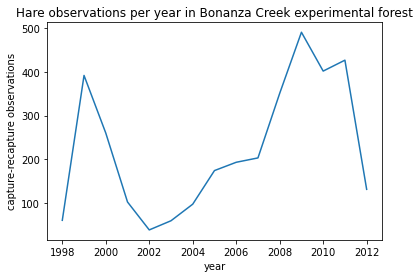

In [39]:
# make a line plot of the hare observations by year
# add a title and y-axis label
hares.groupby('year').count().date.plot(ylabel='capture-recapture observations',
                                        title='Hare observations per year in Bonanza Creek experimental forest')

In [38]:
#hares.groupby('month').mean().weight.plot(type='bar')

In [40]:
# use `value_counts()` to check counts of unique values in the sex column 
hares.sex.value_counts()

F     1161
M      730
f      556
m      515
?       40
F?      10
f        4
m        4
f?       3
M?       2
m?       2
pf       1
Name: sex, dtype: int64

In [46]:
# check if it has nans
print(hares.sex.hasnans)

# add the dropna=False parameter
hares.sex.value_counts(dropna=False)

# check the metadata on website
# discuss the results with your team

True


F      1161
M       730
f       556
m       515
NaN     352
?        40
F?       10
f         4
m         4
f?        3
M?        2
m?        2
pf        1
Name: sex, dtype: int64

In [47]:
# get the unique values for the sex column
hares.sex.unique()

array([nan, 'M', 'F', '?', 'F?', 'M?', 'pf', 'm', 'f', 'f?', 'm?', 'f ',
       'm '], dtype=object)

In [48]:
# create a new column called `sex_simple` where
#   'F','f', and 'f ' get assigned to 'female'
#   'M','m', and 'm ' get assigned to 'male'
#   anything else gets assigned np.nan
# HINT: use np.select like we did on Monday

conditions = [(hares.sex == 'F') | (hares.sex == 'f') | (hares.sex == 'f '),
              (hares.sex == 'M') | (hares.sex == 'm') | (hares.sex == 'm ')]

choices = ['female', 'male']

hares['sex_simple'] = np.select(conditions, choices, default=np.nan)

# check the counts of unique values in the new `sex_simple` column
hares.sex_simple.value_counts(dropna=False)

female    1721
male      1249
nan        410
Name: sex_simple, dtype: int64

sex_simple
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
nan       AxesSubplot(0.125,0.125;0.775x0.755)
Name: weight, dtype: object

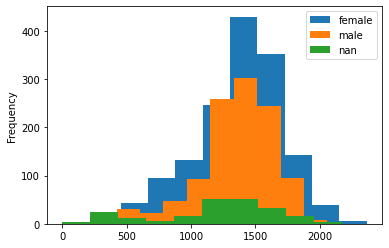

In [50]:
hares.groupby('sex_simple').weight.plot(kind='hist', legend=True)

## Maybe stop lab here?
What follows is some other exercises I thought about. 

<AxesSubplot:>

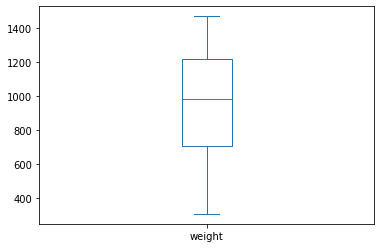

In [66]:
# something with only juvenile (j) hares
#hares[hares.age == 'j'].weight.plot(kind='box', legend=True)

In [22]:
hares.grid.value_counts(dropna=False)

bonrip     2030
bonbs       929
bonmat      260
Bonbs       152
bonmat        9
Name: grid, dtype: int64

In [67]:
hares.grid.unique()
#hares.trap.unique()

array(['bonrip', 'bonbs', 'Bonbs', 'bonmat', 'bonmat '], dtype=object)

In [68]:
conditions = [hares.grid == 'bonrip',
              (hares.grid == 'bonmat') | (hares.grid == 'bonmat ') | (hares.grid == 'bonbs') | (hares.grid == 'Bonbs')]

choices = ['Bonanza Riparian', 'Bonanza Mature']
hares['grid_clean'] = np.select(conditions,choices,default=np.nan)
hares.grid_clean.value_counts()

Bonanza Riparian    2030
Bonanza Mature      1350
Name: grid_clean, dtype: int64

In [70]:
hares.groupby(['sex_simple','grid_clean']).weight.mean()

sex_simple  grid_clean      
female      Bonanza Mature      1289.578450
            Bonanza Riparian    1405.882892
male        Bonanza Mature      1345.283925
            Bonanza Riparian    1353.427900
nan         Bonanza Mature      1185.905797
            Bonanza Riparian    1206.392405
Name: weight, dtype: float64